# Customer Churn Prediction
### Customer Churn is when customers discontinue using a business's product or service. Keeping existing customers is just as important as acquiring new customers. It is crucial for businesses to be able to predict which customers they may lose, so efforts can be made to keep their business. By identifying trends in churn rate, a company can use the information as an opportunity for growth by working to reduce customer churn in identified areas.


In [47]:

import pandas as pd
import numpy as np

In [48]:
df = pd.read_csv('data.csv')
df
#Data from Kaggle: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [49]:
df.sample(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2872,8148-NLEGT,Female,0,Yes,Yes,42,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,22.95,1014.25,No
1908,8232-UTFOZ,Male,0,No,No,69,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1399.35,No
4898,8993-PHFWD,Female,0,No,No,3,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,25.25,58.9,Yes
5330,5747-PMBSQ,Male,1,Yes,No,10,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Month-to-month,Yes,Mailed check,92.50,934.1,Yes
3443,5996-NRVXR,Male,1,Yes,No,40,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),98.15,4116.8,No
3925,9938-ZREHM,Female,0,Yes,No,37,Yes,Yes,DSL,No,...,No,Yes,No,Yes,One year,No,Mailed check,72.10,2658.4,No
719,6952-OMNWB,Male,1,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),80.35,5589.3,No
3282,0330-BGYZE,Male,0,Yes,No,60,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),102.50,6157.6,No
5949,8756-RDDLT,Female,0,No,No,68,No,No phone service,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,44.95,3085.35,No
803,3174-AKMAS,Female,0,Yes,No,46,Yes,No,DSL,No,...,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),64.20,3009.5,No


## Understanding the Data
##### This data looks at a telephone companies data where each row represents a customer and the services they are enrolled in (phone, multiple lines, internet, online security, online backup, device protection, tech support), as well as customer demographic and account information such as gender, how long they have used the service, and how much they are paying, and finally, if the customer is still using the service.



In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [51]:
df = df.drop(columns='customerID')
df.drop_duplicates(inplace=True)



In [52]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

#Total Charges has 11 null values

nan_rows = df[df['TotalCharges'].isnull()]
print(nan_rows)

#Does not make sense to have a 0 tenure but have monthly charges and nan total charges. I feel confident removing these 11 rows.

df = df.dropna(subset=['TotalCharges'])

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

In [53]:
# Verify the rows are dropped
print(df.isnull().sum())


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [54]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000
mean,32.520399,64.888666,2290.353388
std,24.520441,30.064769,2266.820832
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,408.312500
50%,29.000000,70.400000,1403.875000
75%,56.000000,89.900000,3807.837500
max,72.000000,118.750000,8684.800000


In [55]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [56]:
df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes



## Data Visualizations

In [57]:
# Gender vs Churn
gender_churn = df.groupby(['gender', 'Churn']).size().reset_index(name='Count')


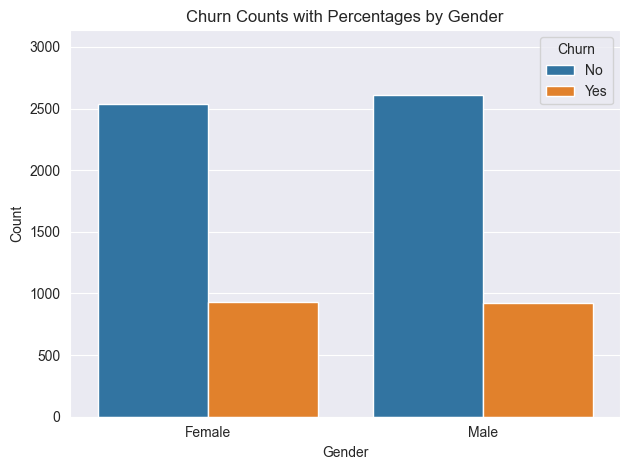

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot with counts on the y-axis
ax = sns.barplot(data=gender_churn, x='gender', y='Count', hue='Churn')

# Adjust plot details
plt.title('Churn Counts with Percentages by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.ylim(0, gender_churn['Count'].max() * 1.2)  # Add some headroom above bars
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


         Contract Churn  Count
0  Month-to-month    No   2210
1  Month-to-month   Yes   1643
2        One year    No   1306
3        One year   Yes    166
4        Two year    No   1637
5        Two year   Yes     48


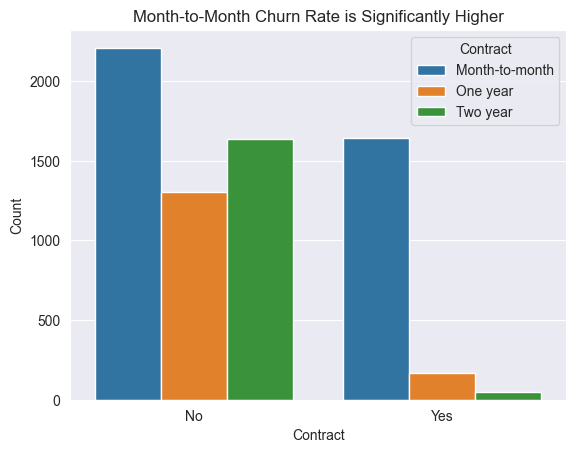

In [59]:
# Contract vs Churn
contract_churn = df.groupby(['Contract', 'Churn']).size().reset_index(name='Count')
print(contract_churn)
# Create bar plot
sns.barplot(data=contract_churn, x='Churn', y='Count', hue='Contract')

plt.title('Month-to-Month Churn Rate is Significantly Higher')
plt.xlabel('Contract')
plt.show()

### Month-to-month churn rates are much higher than the one-year and two-year contracts.
### Possible Action Item: Incentivise customers to sign one-year or two-year contracts. Could the company have a special offer to get a month free, for example, when signing a yearly contract? Two months free for 2-year contract? Or possibly include a service free of additional charge with year or 2 year contracts.

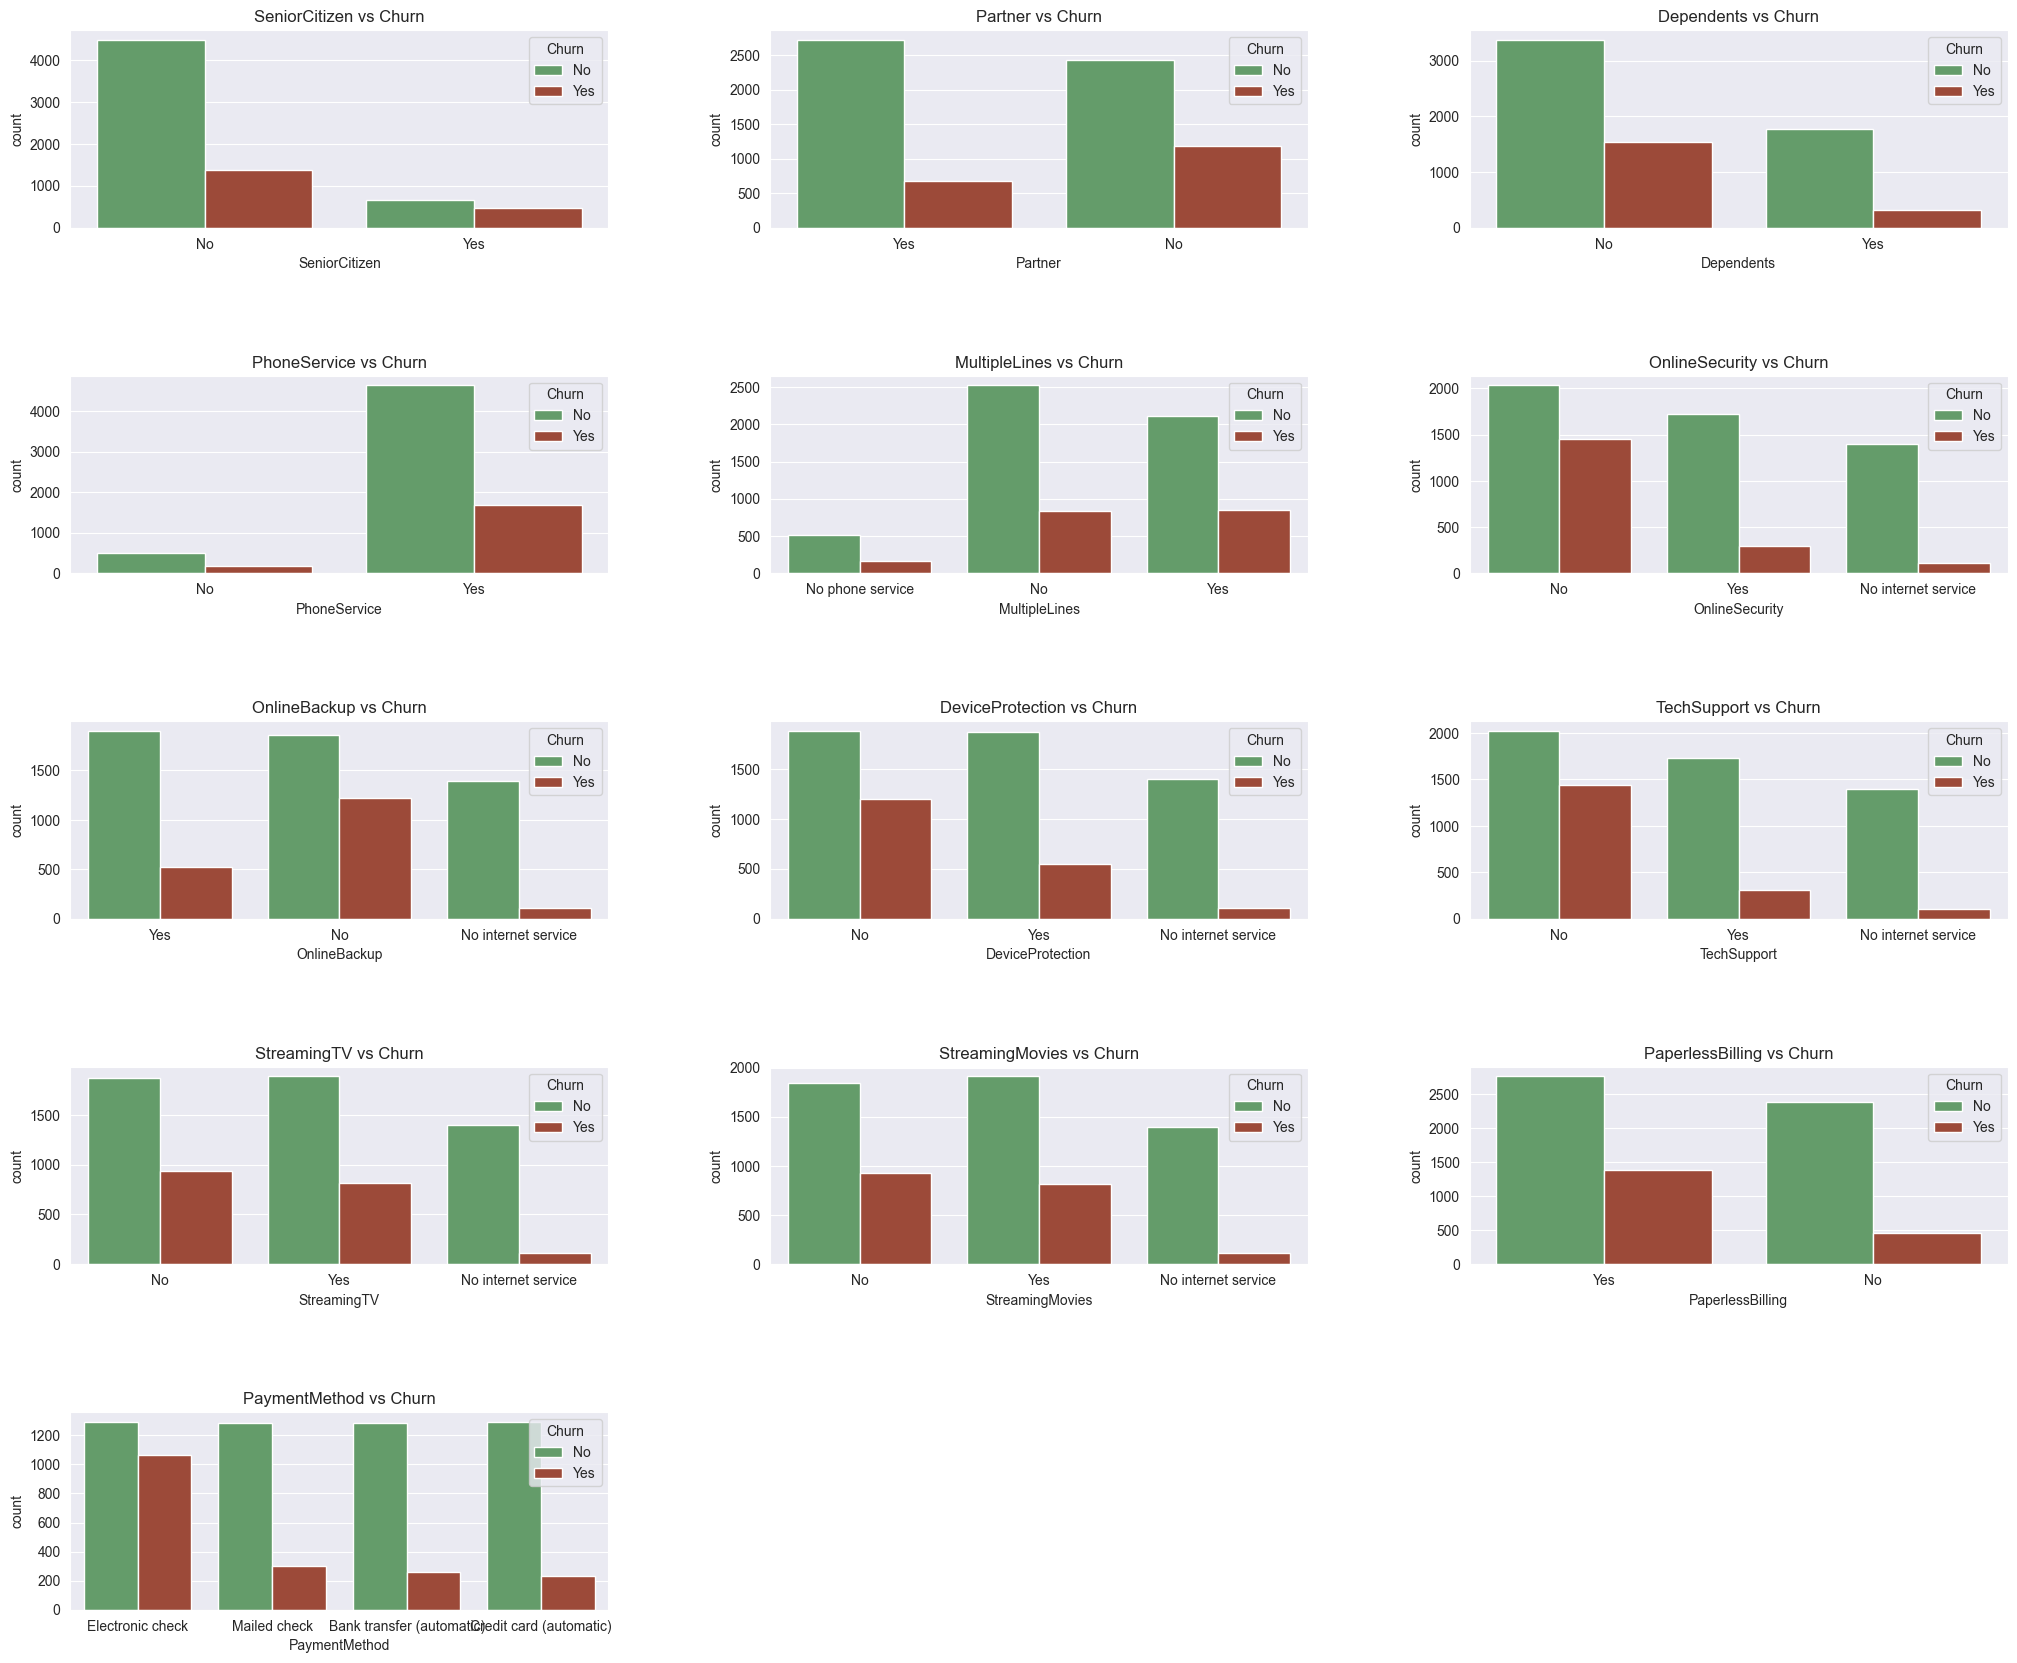

In [60]:
#There are a lot of categorical variables. Quickly plot all their relationships individually with Churn.
#
# Plotting the impact of categorical features on ‘Churn’
cat_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(25, 25))
for i, cat in enumerate(cat_cols):
    plt.subplot(6, 3, i + 1)
    sns.countplot(data=df, x=cat, hue='Churn', palette={"Yes": "#ad3f28", "No": "#5BA562"})
    plt.title(f'{cat} vs Churn')  # Add title for each subplot

# Increase spaces between subplots
plt.subplots_adjust(hspace=0.75, wspace=0.3)

plt.show()

### Initial Takeaways-
#### Senior Citizen: Seniors see a high churn rate. Is the telephone service not accessible/user-friendly for seniors?
#### Partner: Customers without a partner see a higher churn rate. Are they missing out on a certain benefit? Could this be related to not having multiple lines? - We see a similar trend with people without dependants. Is this telephone company only worth it to those with partners/dependents and not attractive for singles?
#### Online Security: Customers without the Online Security feature see a significantly higher churn rate (over 3x the churn rate compared to those with the Security Feature). It seems the Online Security feature could be a lot of value to customers.
#### Online Backup: Customers without the Online Backup feature see 2x the churn rate of those with the online backup feature. The online backup feature also seems to be keeping customers generally satisfied.
#### Device Protection: Customers without the Device Protection feature see 2x the churn rate of those with the online backup feature. The device protection feature also seems to be keeping customers generally satisfied. However, we are still seeing around 25% of those with the feature churn.
#### Tech Support: Customers with the tech support feature are staying with the company 3x more than those without it. Tech support also seems to be keeping customers satisfied compared to those without it.
#### Streaming: Neither Streaming Movies or Streaming TV seem to have a huge impact on churn.
#### Paperless Billing: Those who are enrolled in Paperless Billing churn 3x more often than those who are not. This is odd. What about the Paperless Billing process is pushing customers away? Are there issues with the billing software? Are there excessive fees?
#### Payment Method: Around 40% of customers with an electronic check payment method have churned - This is over 4x more than any other payment method. There seems to be a major issue specifically with customers who pay via electronic check. Similar to above, are there issues with the billing software? Are there excessive fees?


Text(0.5, 9.444444444444438, 'Tenure')

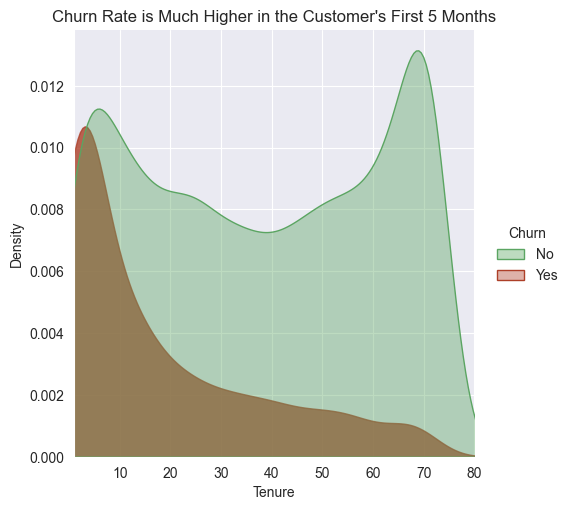

In [61]:
# Histogram of Tenure vs Churn (Two Distributions)

sns.displot(df, x="tenure", hue="Churn", kind='kde', fill=True, alpha=0.1,
            palette={"Yes": "#ad3f28", "No": "#5BA562"})
plt.gca().collections[0].set_alpha(0.8)  # Increase alpha specifically for 'Churn = Yes'
plt.xlim((1, 80))

plt.title("Churn Rate is Much Higher in the Customer's First 5 Months")
plt.xlabel('Tenure')

### There is a much higher density of churn within the first 5 to 10 months - a pretty even split between customer's who leave vs stay. This means that half of the customers who start the service choose to stop within the first 10 months. After the 10 month to a year mark, the churn rate significantly decreases. If the customer is churning before the year mark, they are clearly in a month-to-month contract, which we previously discovered has a higher churn rate. However, there is still a decent amount of churn in the year to two-year tenure range. Are their ways to combat this with incentives again? Could they offer a discount to repeat customers?


Text(0.5, 1.0, 'Churn Rate over 50% in the First 5 Months')

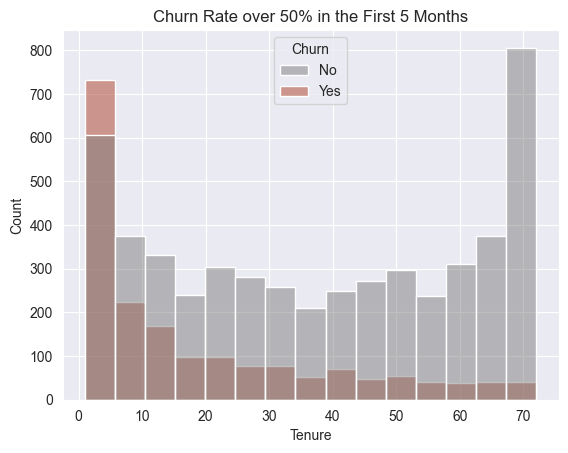

In [62]:
sns.histplot(df, x='tenure', hue='Churn', palette={"Yes": "#ad3f28", "No": "grey"})
plt.xlabel('Tenure')
plt.title('Churn Rate over 50% in the First 5 Months')

Text(0.5, 9.444444444444438, 'Monthly Charges')

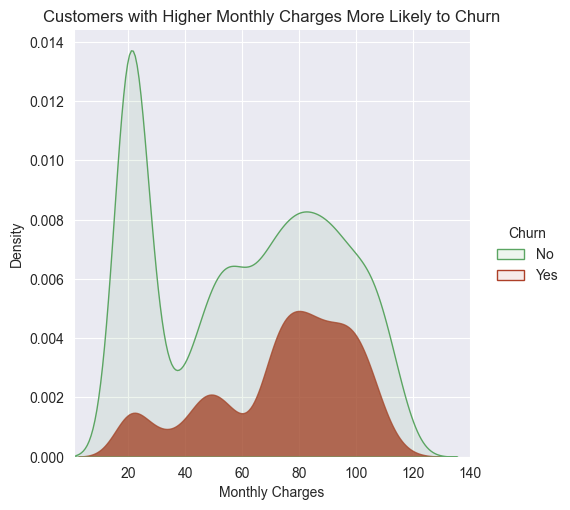

In [63]:
sns.displot(df, x="MonthlyCharges", hue="Churn", kind='kde', fill=True, alpha=0.1,
            palette={"Yes": "#ad3f28", "No": "#5BA562"})
plt.gca().collections[0].set_alpha(0.8)  # Increase alpha specifically for 'Churn = Yes'
plt.xlim((1, 140))

plt.title("Customers with Higher Monthly Charges More Likely to Churn")
plt.xlabel('Monthly Charges')

## ML: Churn Prediction Model

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

data = df.copy()

# Selecting categorical columns that need encoding, excluding 'Churn'
cat_cols = [col for col in data.select_dtypes(include=['object']).columns if col != 'Churn']

# Encode categorical data
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Ensure dense output
encoded_features = encoder.fit_transform(data[cat_cols])

# Get new feature names
new_feature_names = encoder.get_feature_names_out(cat_cols)

# Create a new DataFrame for the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=new_feature_names, index=data.index)  # Ensure same index

# Drop the original categorical columns and concatenate the new encoded dataframe
data = data.drop(cat_cols, axis=1)
data = pd.concat([data, encoded_df], axis=1)  # Concatenate along columns

In [65]:
# Splitting the data
X = data.drop('Churn', axis=1)
y = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
# Standardization for Numerical Cols
from sklearn.preprocessing import StandardScaler

num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

# Scaling Numerical Features
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])

In [67]:
from sklearn.svm import SVC

svc_model = SVC(random_state=7)
svc_model.fit(X_train, y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test, y_test)
print("SVM accuracy is :", accuracy_svc)

SVM accuracy is : 0.8273894436519258


In [68]:
#Decsision Tree Model
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=16)
dt_model.fit(X_train, y_train)
dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test, y_test)
print("Decision Tree accuracy is :", accuracy_dt)

Decision Tree accuracy is : 0.7482168330955777


### Decision Tree accuracy is relatively low at 74.82%

In [69]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier(random_state=72)
random_forest = rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8059914407988588
Confusion Matrix:
 [[968 113]
 [159 162]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1081
           1       0.59      0.50      0.54       321

    accuracy                           0.81      1402
   macro avg       0.72      0.70      0.71      1402
weighted avg       0.80      0.81      0.80      1402



### Random Tree Model has an accuracy of .806. While the model was 90% correct on those who would not churn, it only predicted 50% of those who did churn.
### Not bad, not great. Let's continue trying to improve the model.



In [70]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=432)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

accuracy_lr = lr_model.score(X_test, y_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8231098430813124
Confusion Matrix:
 [[969 112]
 [136 185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1081
           1       0.62      0.58      0.60       321

    accuracy                           0.82      1402
   macro avg       0.75      0.74      0.74      1402
weighted avg       0.82      0.82      0.82      1402



### Logistic Regression model is actually performing stronger with 82.3% overall accuracy, and improved the prediction for those who will churn to 58% accuracy (compared to the RF model at 50%).



In [71]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=67)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Accuracy", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

Gradient Boosting Accuracy 0.8238231098430813
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1081
           1       0.63      0.56      0.59       321

    accuracy                           0.82      1402
   macro avg       0.75      0.73      0.74      1402
weighted avg       0.82      0.82      0.82      1402



## Gradient Boost comes in right above the logistic regression model with 82.4% accuracy

In [72]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier(random_state=301)
ab_model.fit(X_train, y_train)
ab_pred = ab_model.predict(X_test)
print("AdsBoost Accuracy", accuracy_score(y_test, ab_pred))
print(classification_report(y_test, ab_pred))


AdsBoost Accuracy 0.818830242510699
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1081
           1       0.62      0.53      0.57       321

    accuracy                           0.82      1402
   macro avg       0.74      0.72      0.73      1402
weighted avg       0.81      0.82      0.81      1402



### AdsBoost at 81.9% Accuracy

In [73]:
from xgboost import XGBClassifier
from sklearn import metrics

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb = xgb_model.predict(X_test)
metrics.accuracy_score(y_test, xgb)

print("XGB Accuracy")
print(accuracy_score(y_test, xgb))
print(classification_report(y_test, xgb))

XGB Accuracy
0.81169757489301
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1081
           1       0.59      0.58      0.59       321

    accuracy                           0.81      1402
   macro avg       0.73      0.73      0.73      1402
weighted avg       0.81      0.81      0.81      1402



In [74]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[995  86]
 [156 165]]


0.8273894436519258

### XGBoost interestingly performed slightly worse with 81.2% accuracy.

Final Accuracy Score 
0.8316690442225392
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1081
           1       0.67      0.53      0.59       321

    accuracy                           0.83      1402
   macro avg       0.77      0.73      0.74      1402
weighted avg       0.82      0.83      0.82      1402



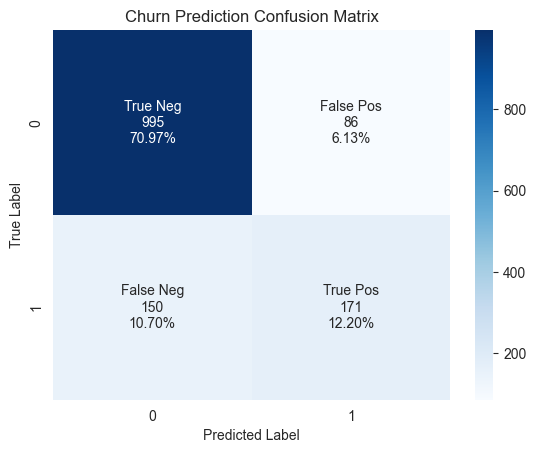

In [75]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
ab = AdaBoostClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42, probability=True)

vote_cl = VotingClassifier(estimators=[('gbc', gb), ('lr', lr), ('abc', ab), ('svc', svc)], voting='soft')
vote_cl.fit(X_train, y_train)
predictions = vote_cl.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


def model_evaluation(model, xtest, ytest):
    model_predictions = model.predict(xtest)
    # Confusion Matrix
    con_matrix = confusion_matrix(ytest, model_predictions)
    cm_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    cm_counts = [value for value in con_matrix.flatten()]
    cm_percentages = ['{0:.2%}'.format(value) for value in con_matrix.flatten() / np.sum(con_matrix)]
    labels_cm = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(cm_names, cm_counts, cm_percentages)]
    labels_cm = np.asarray(labels_cm).reshape(2, 2)
    sns.heatmap(con_matrix, annot=labels_cm, cmap='Blues', fmt='')
    plt.title('Churn Prediction Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

model_evaluation(vote_cl, X_test, y_test)




## Voting Model has the highest accuracy at 83.2%.

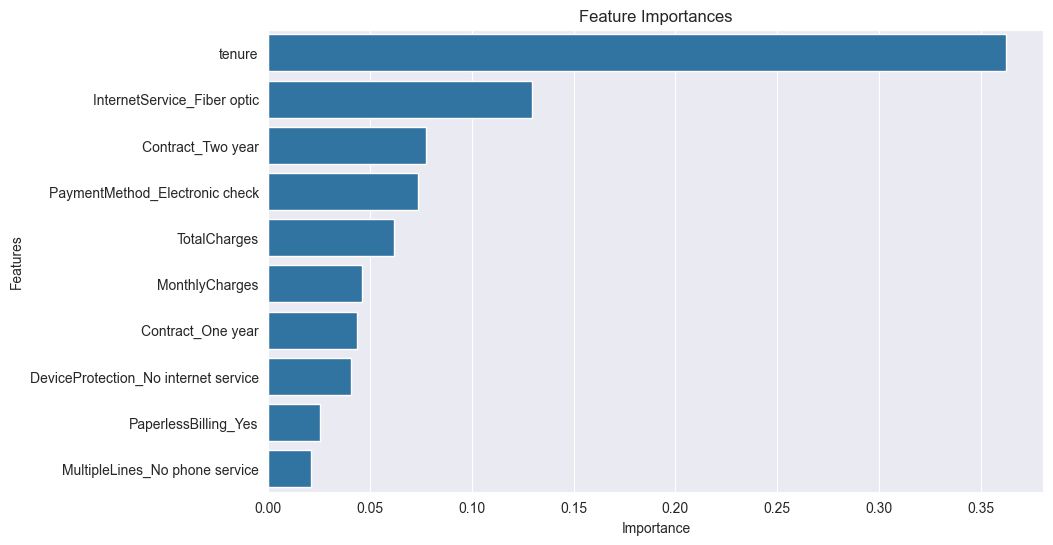

In [76]:
# What features impact the model the most?
feature_importances = []

# Collect feature importances from tree-based classifiers only
for estimator_name, estimator in vote_cl.named_estimators_.items():
    if hasattr(estimator, 'feature_importances_'):
        feature_importances.append(estimator.feature_importances_)

# Calculate mean feature importances across all contributing estimators
if feature_importances:
    mean_importances = np.mean(feature_importances, axis=0)
    feature_names = X_train.columns  # assuming X_train is your feature DataFrame

    # Create a DataFrame to display feature names and their importance
    importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': mean_importances})
    importances_df = importances_df.sort_values(by='Importance', ascending=False).head(10)

    # Plotting the feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importances_df)
    plt.title('Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()
else:
    print("No feature importances extracted.")



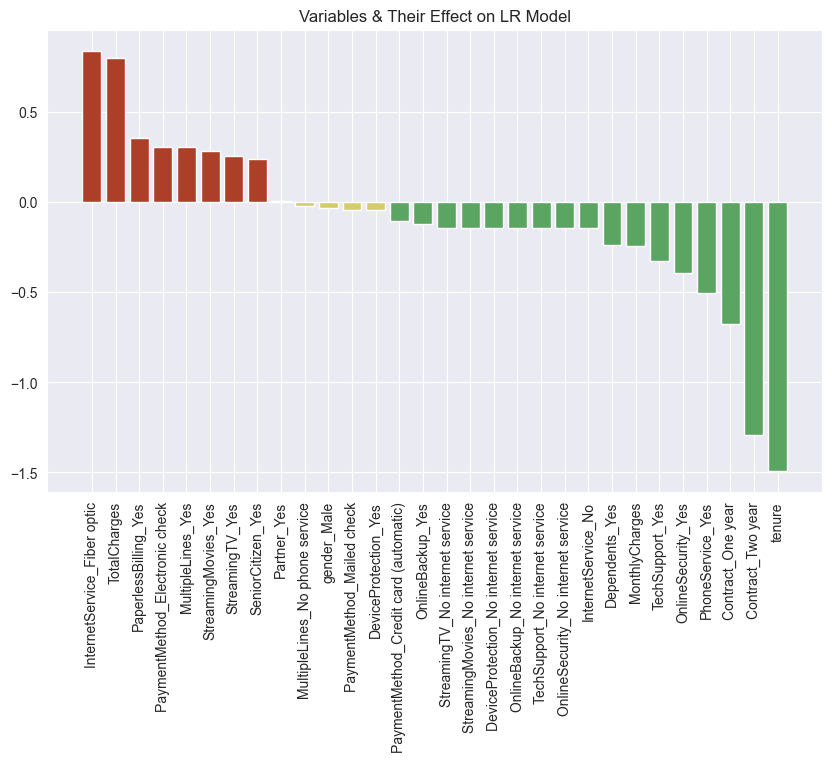

In [77]:
weights = pd.Series(lr_model.coef_[0], index=X.columns.values)
# Applying color conditions with explicit boundaries
colors = weights.apply(lambda x: '#ad3f28' if x > 0 else ('#d5cb6b' if -0.05 < x <= 0 else '#5BA562'))


# Sort and plot with these colors
sorted_weights = weights.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(sorted_weights.index, sorted_weights, color=colors[sorted_weights.index])
plt.title('Variables & Their Effect on LR Model')
plt.xticks(rotation=90)  # Rotate labels for better readability if needed
plt.show()



### However, depending on the business goals, this model may not be the best suited.
### If you predict a customer won't churn, but they do (false negative), you may lose revenue and any chance to intervene to retain the customer.
### Next, I will dig into a model that reduces false negatives (where it is predicted a customer would not churn, but they did).






0.7910128388017118
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1081
           1       0.53      0.73      0.62       321

    accuracy                           0.79      1402
   macro avg       0.72      0.77      0.74      1402
weighted avg       0.82      0.79      0.80      1402

[[874 207]
 [ 86 235]]


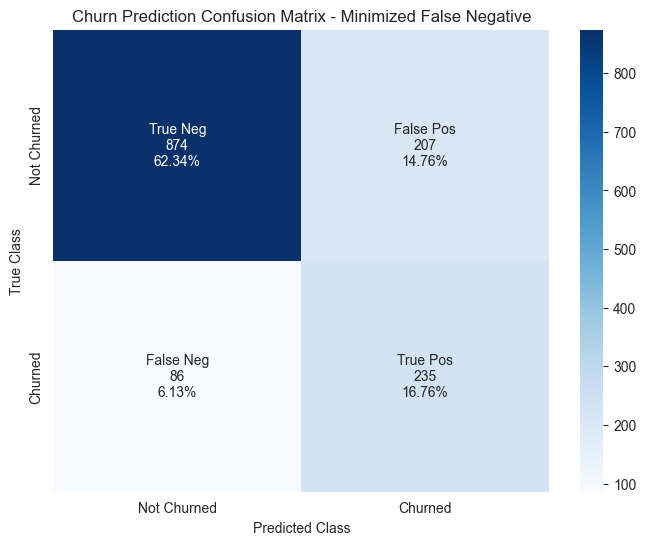

In [78]:
# After fitting the classifier
probabilities = vote_cl.predict_proba(X_test)
predictions = (probabilities[:, 1] >= 0.35)  # Lower the threshold to 0.35

# Evaluate new predictions with adjusted threshold
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

con_mat = confusion_matrix(y_test, predictions)

# Labels for the classes
class_labels = ['Not Churned', 'Churned']

# Labels for each class in the matrix
names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Counts in each cell
counts = ["{0:0.0f}".format(value) for value in con_mat.flatten()]

# Percentages for each cell
percentages = ["{0:.2%}".format(value) for value in con_mat.flatten() / np.sum(con_mat)]

# Combine names, counts, and percentages
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Create a heatmap for the confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot=labels, fmt='', cmap='Blues', xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title('Churn Prediction Confusion Matrix - Minimized False Negative')

plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

### By decreasing the threshold to .35, the False Negative category was significantly reduced (coming in at 6% compared to the previous 11%). On the other hand, False positives, where in this case, the model predicted they would churn but actual customers did not, increased from 6% to nearly 15%. This could also be problematic as the company might potentially offer discounts to additional customers than necessary, losing out on revenue. Depending on the priority for the business and predicted affects of the retention efforts, a company may choose one model over the other.

In [79]:
weights

tenure                                  -1.490246
MonthlyCharges                          -0.243098
TotalCharges                             0.801903
gender_Male                             -0.034610
SeniorCitizen_Yes                        0.242049
Partner_Yes                              0.004761
Dependents_Yes                          -0.235629
PhoneService_Yes                        -0.502041
MultipleLines_No phone service          -0.022594
MultipleLines_Yes                        0.304472
InternetService_Fiber optic              0.841784
InternetService_No                      -0.144611
OnlineSecurity_No internet service      -0.144611
OnlineSecurity_Yes                      -0.392321
OnlineBackup_No internet service        -0.144611
OnlineBackup_Yes                        -0.122555
DeviceProtection_No internet service    -0.144611
DeviceProtection_Yes                    -0.045589
TechSupport_No internet service         -0.144611
TechSupport_Yes                         -0.327701


### Each coefficient value represents the impact of that particular feature on the likelihood of a customer churning, where:

#### Positive coefficients increase the probability of churn (i.e., make churn more likely when the feature value increases).
#### Negative coefficients decrease the probability of churn (i.e., make churn less likely when the feature value increases).

### Analysis on key features:

#### Tenure (-1.490246): A more negative coefficient suggests that longer tenure significantly reduces the likelihood of churn. Customers who have been with the service longer are less likely to leave.
#### MonthlyCharges (-0.243098): A negative coefficient indicates that higher monthly charges slightly reduce the likelihood of churn, which might seem counterintuitive. This could suggest that customers with higher charges are perhaps tied into more comprehensive services or longer-term contracts that discourage switching.
#### TotalCharges (0.801903): A positive coefficient here suggests that as the total charges a customer has accrued increase, so does the likelihood of churn. This could indicate customer fatigue with high cumulative costs over time.
#### InternetService_Fiber optic (0.841784): This positive coefficient indicates that customers with fiber optic internet service are more likely to churn, possibly due to higher expectations or competitive offerings from other providers.
#### Contract_One year (-0.677142) and Contract_Two year (-1.291733): More negative coefficients for these features suggest that longer contractual commitments significantly reduce churn. Customers in one-year or two-year contracts are much less likely to leave compared to those on month-to-month plans.
#### PaymentMethod_Electronic check (0.308000): A positive coefficient here indicates a higher likelihood of churn among customers using electronic checks. This might reflect dissatisfaction or convenience issues with this payment method.
#### TechSupport_Yes (-0.327701): The negative coefficient suggests that having tech support decreases the likelihood of churn, implying that good technical support retains customers.
#### The signs and magnitudes of these coefficients can guide business strategies, such as improving service features that are linked to higher churn or promoting features that contribute to customer retention.

## Potential Action Steps
### Enhance Customer Retention Programs for Long-Term Customers:
#### Develop loyalty programs or incentives specifically targeting long-term customers since tenure has a significant negative correlation with churn. Rewards could include discounts, special offers, or exclusive services.
### Review Pricing Strategies:
#### While the model shows that higher monthly charges slightly reduce churn, it's important to assess if these charges are aligned with customer value perception. Consider introducing more flexible pricing tiers or bundle offers that enhance perceived value, especially for customers with higher total charges who show a tendency towards churn.
### Improve Fiber Optic Service Satisfaction:
#### Given that customers with fiber optic services are more likely to churn, conduct surveys or focus groups to gather feedback on their concerns. Enhancements might be needed in service reliability, speed, or customer support specific to fiber optic services.
### Promote Longer Contract Commitments:
#### Since one-year and two-year contracts significantly reduce churn, consider promoting these options more aggressively. This could include providing clear comparisons of the long-term savings and benefits over month-to-month plans, or offering sign-up incentives for longer commitments.
### Optimize Payment Methods:
#### Customers using electronic checks are more prone to churn. Explore improving the electronic check payment process or promote alternative payment methods that are perceived as more convenient or reliable, such as automatic credit card payments, which appear to have a lower association with churn.
### Strengthen Support Services:
#### Tech support is a critical service that helps retain customers. Enhancing the availability, responsiveness, and quality of tech support could further decrease churn. Additionally, consider extending these support services to include more proactive outreach and troubleshooting for customers.
### Target Improvements in High-Churn Services:
#### Streaming services, particularly streaming movies and TV, show mixed effects on churn. Enhancing content offerings or user experience for these services could improve customer satisfaction and reduce churn rates.
### Paperless Billing and Communication:
#### The positive coefficient for paperless billing suggests unsatisfaction with how billing is handled digitally. Improving the user interface, ensuring clarity in billing statements, and enhancing the overall customer experience with digital interactions could mitigate churn associated with this feature.